In [1]:
import numpy as np
from numpy import nan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, time
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error 

sns.set_style("darkgrid")

In [2]:
df_auto = pd.read_csv("../CSV files/Automobile.csv")
df_auto.head().transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized_losses,168,168,168,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel_type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
number_of_doors,two,two,two,four,four
body_style,convertible,convertible,hatchback,sedan,sedan
drive_wheels,rwd,rwd,rwd,fwd,4wd
engine_location,front,front,front,front,front
wheel_base,88.6,88.6,94.5,99.8,99.4


In [3]:
df_auto.shape

(201, 26)

In [4]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [5]:
df_auto.describe(include ="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,201,NaN,NaN,NaN,0.840796,1.2548,-2,0,1,2,3
normalized_losses,201,NaN,NaN,NaN,125.189,33.573,65,101,122,150,256
make,201,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,201,2,gas,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,201,2,std,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_doors,201,2,four,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_style,201,5,sedan,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive_wheels,201,3,fwd,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_location,201,2,front,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel_base,201,NaN,NaN,NaN,98.797,6.06637,86.6,94.5,97,102.4,120.9


In [6]:
df_auto.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [7]:
for_c = ['make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type','number_of_cylinders']
dest =  df_auto['make'].value_counts().count()
print("number of makers of cars in the dataset is: ", dest)
print("number of fuel types present in the dataset:", df_auto["fuel_type"].value_counts().count())
print("number of aspiration types:", df_auto["aspiration"].value_counts().count())
print("total number of door types", df_auto["number_of_doors"].value_counts().count())
print("number of car body types", df_auto["body_style"].value_counts().count())
print("number of different drive wheel types", df_auto["drive_wheels"].value_counts().count())
print("Number of engine locations", df_auto["engine_location"].value_counts().count())
print("number of the diffrent types of engines", df_auto["engine_type"].value_counts().count())
print("numberof total cylinders", df_auto["number_of_cylinders"].value_counts().count())

number of makers of cars in the dataset is:  22
number of fuel types present in the dataset: 2
number of aspiration types: 2
total number of door types 2
number of car body types 5
number of different drive wheel types 3
Number of engine locations 2
number of the diffrent types of engines 6
numberof total cylinders 7


In [8]:
total = df_auto.make.value_counts()
per = total[0]/sum(total)*100
print("Toyota amounts for", f"{per}%")
total

Toyota amounts for 15.92039800995025%


toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [9]:
df_auto[df_auto["price"]>=20500]
df_auto[df_auto["make"]>="toyota"]

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
146,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348
147,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338
148,1,74,toyota,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488
149,0,77,toyota,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918
150,0,81,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898
151,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778
152,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938
153,0,91,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198
154,0,91,toyota,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898
155,0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788


In [10]:
df3 = df_auto.loc[(df_auto["price"] > 16500)]
print(df3.price.median())
(len(df3)/len(df_auto))*100

20334.5


24.875621890547265

#### Data visualization

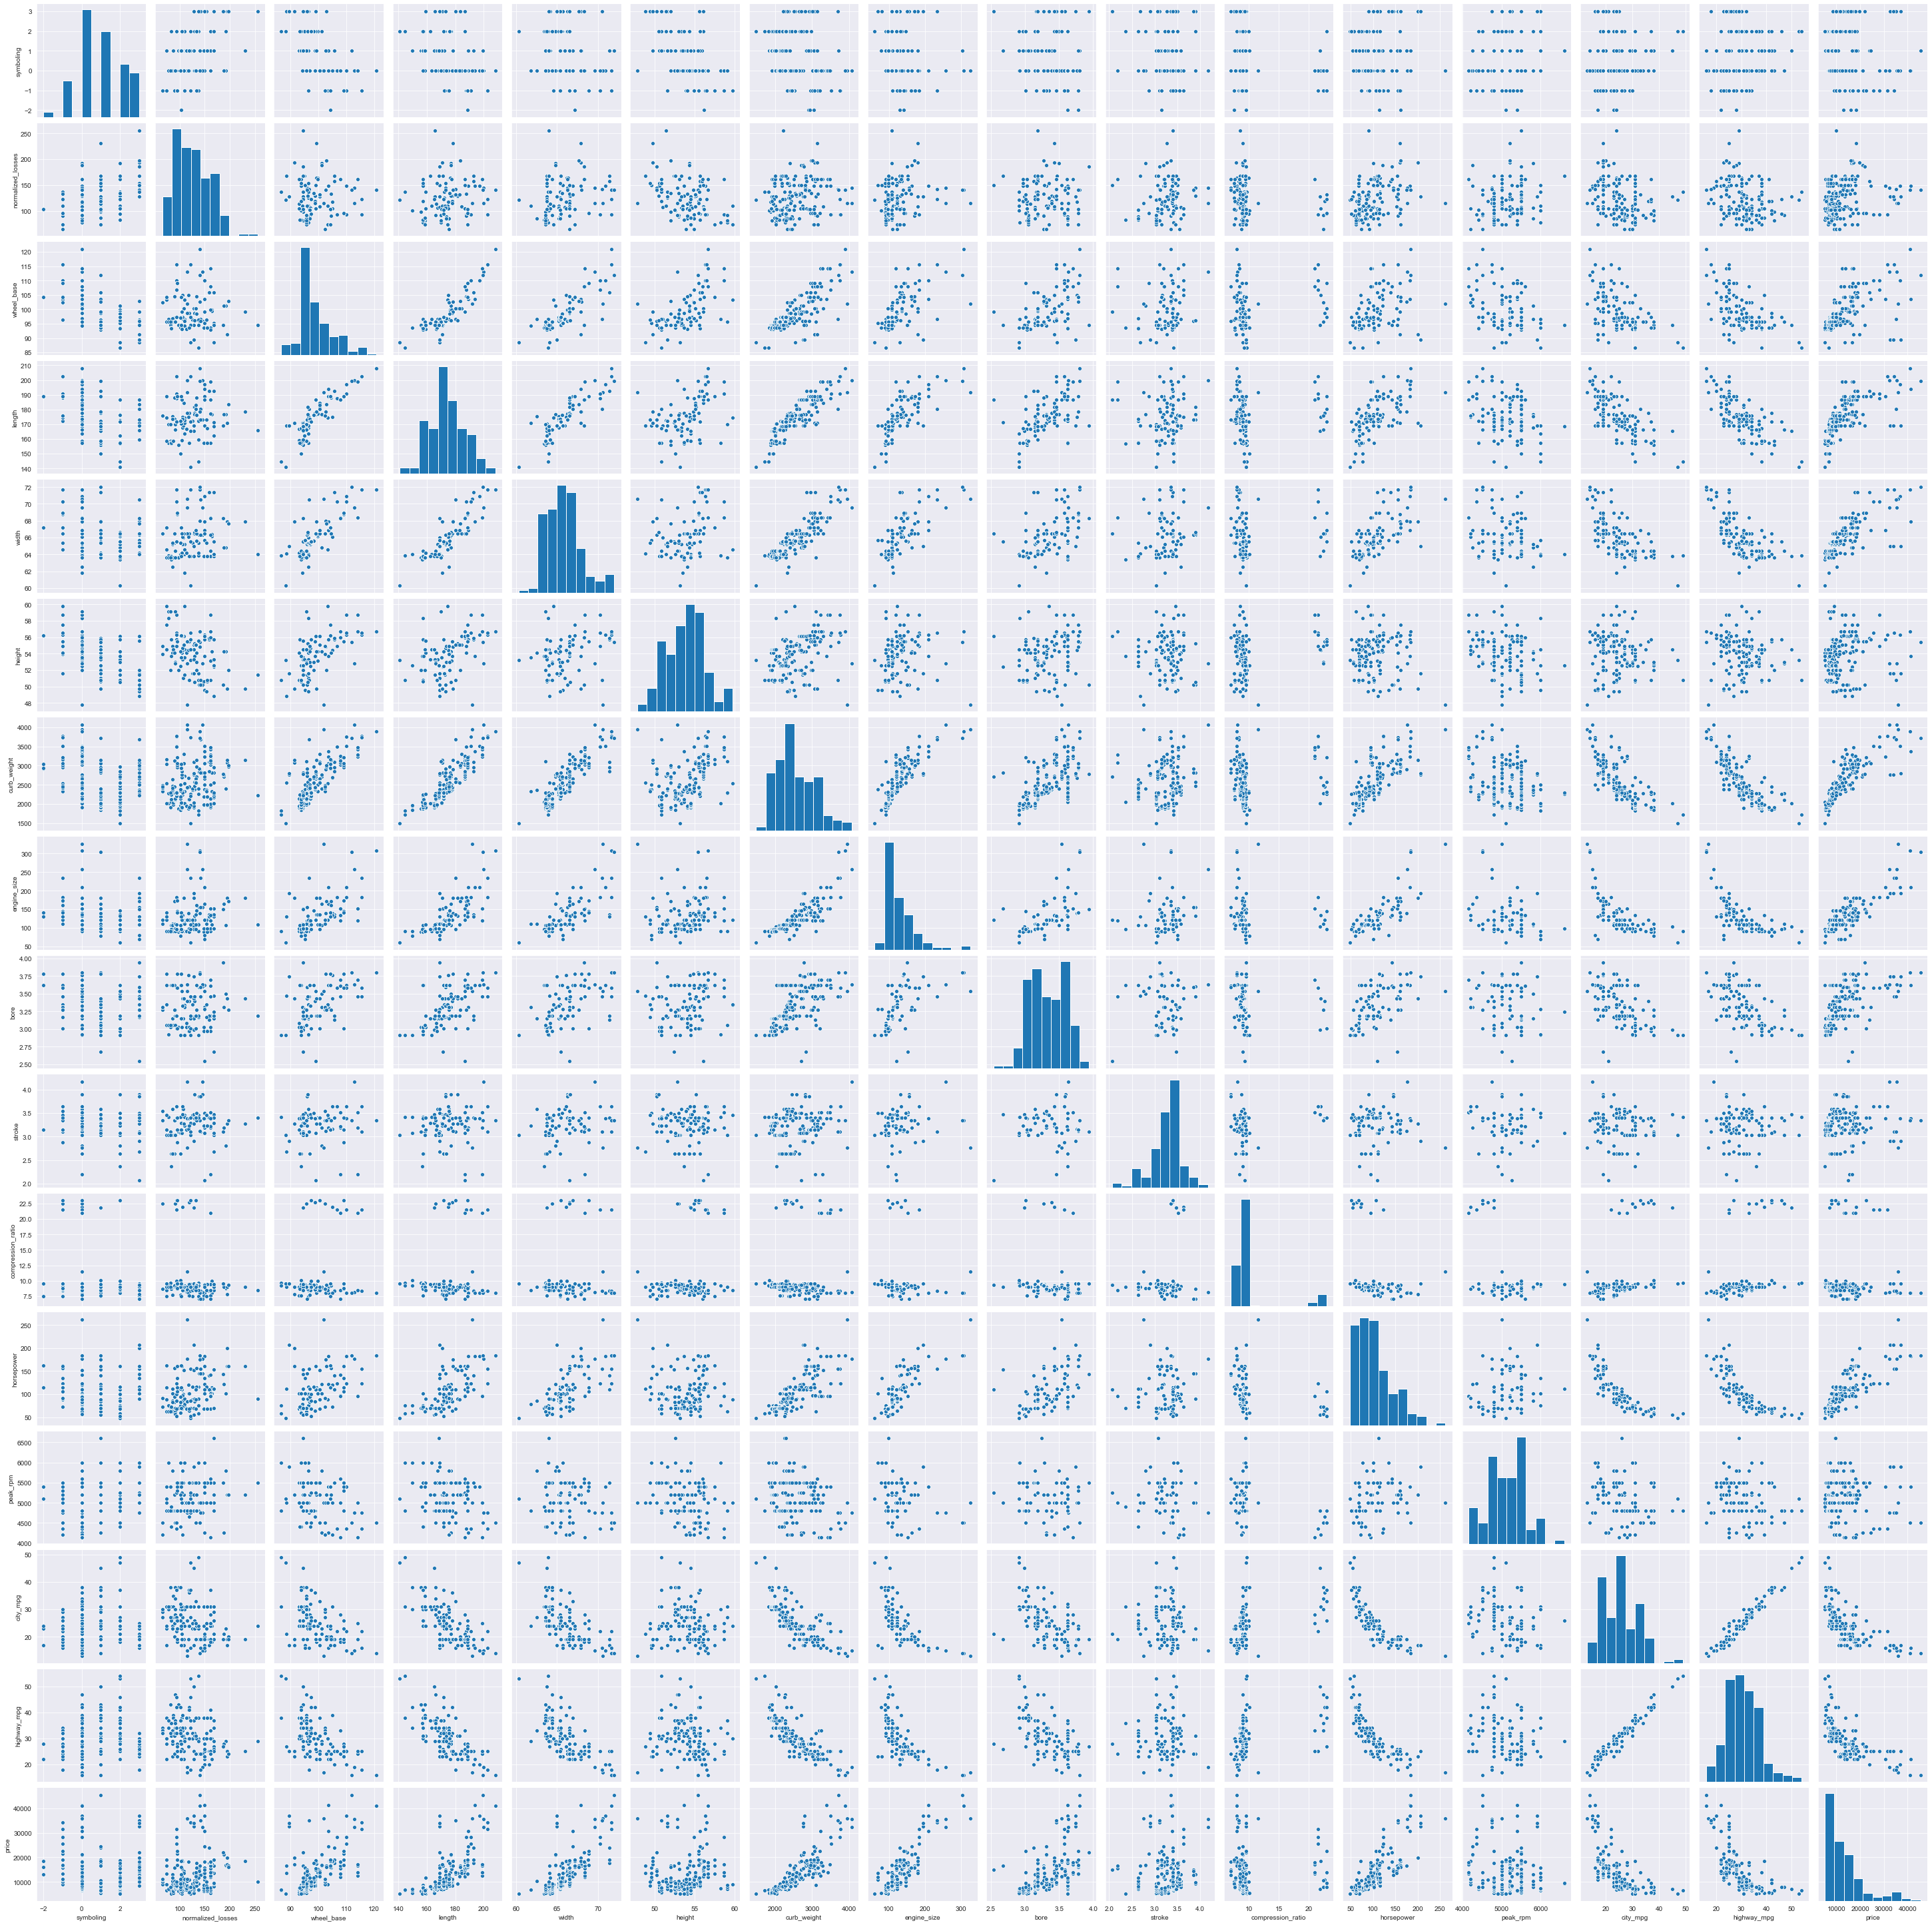

In [11]:
sns.pairplot(df_auto)

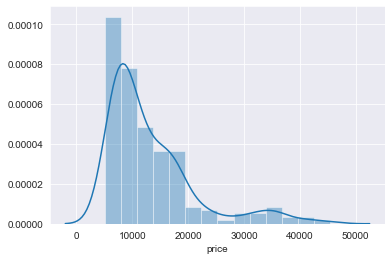

In [12]:
sns.distplot(df_auto.price)

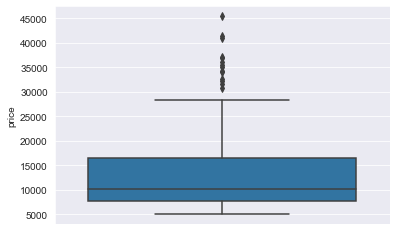

In [13]:
sns.boxplot(y = "price", data = df_auto)

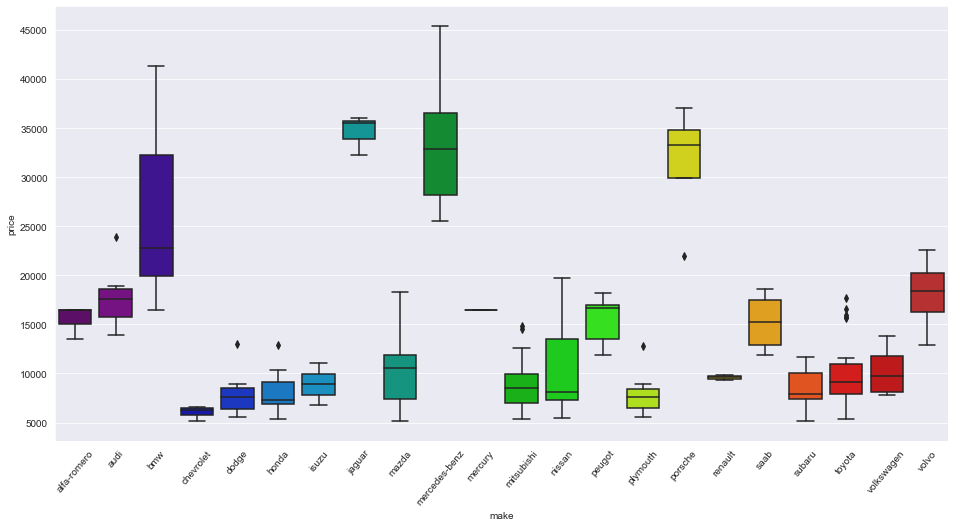

In [14]:
plt.figure(figsize = (16, 8))
make_pt = sns.boxplot(x = "make", y = "price", data = df_auto, palette = "nipy_spectral")
make_pt.set_xticklabels(make_pt.get_xticklabels(), rotation=50);

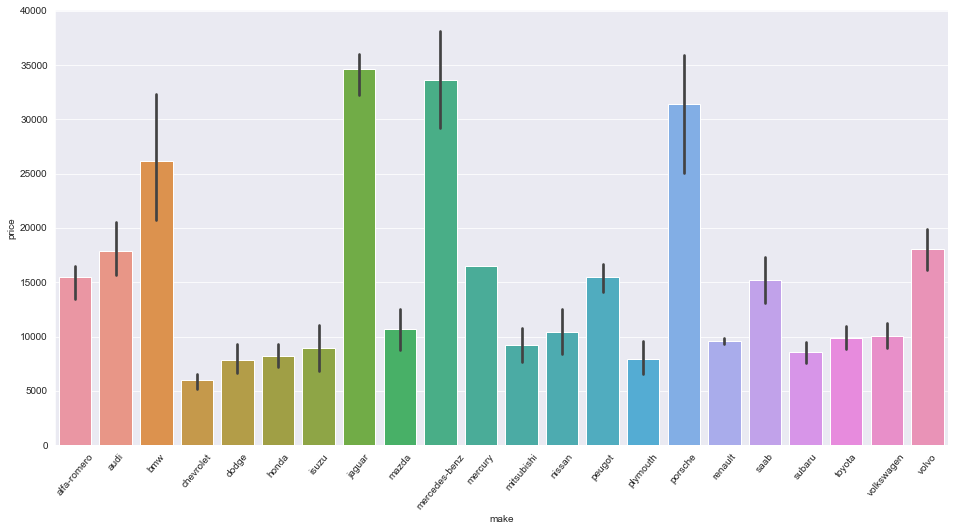

In [15]:
plt.figure(figsize = (16, 8))
b_make = sns.barplot(x = "make", y = "price", data = df_auto)
b_make.set_xticklabels(b_make.get_xticklabels(), rotation=50);

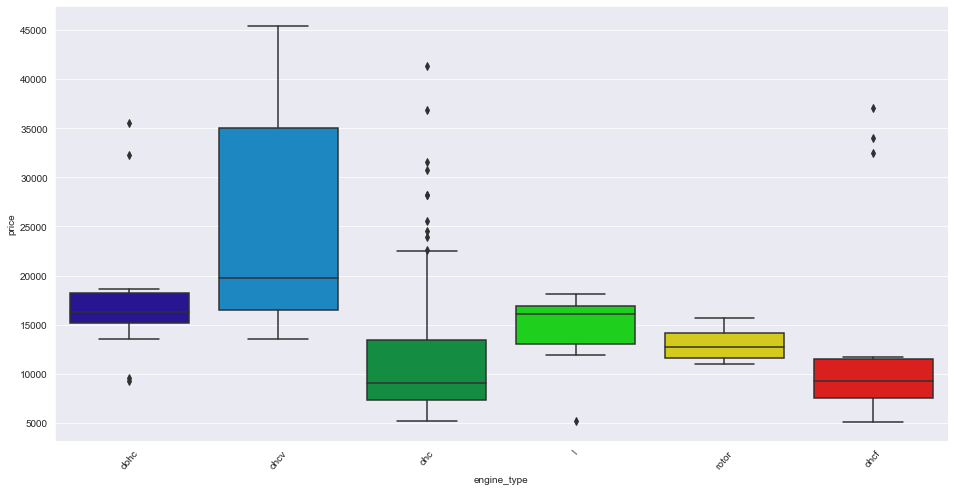

In [16]:
plt.figure(figsize = (16, 8))
make_pt = sns.boxplot(x = "engine_type", y = "price", data = df_auto, palette = "nipy_spectral")
make_pt.set_xticklabels(make_pt.get_xticklabels(), rotation=50);

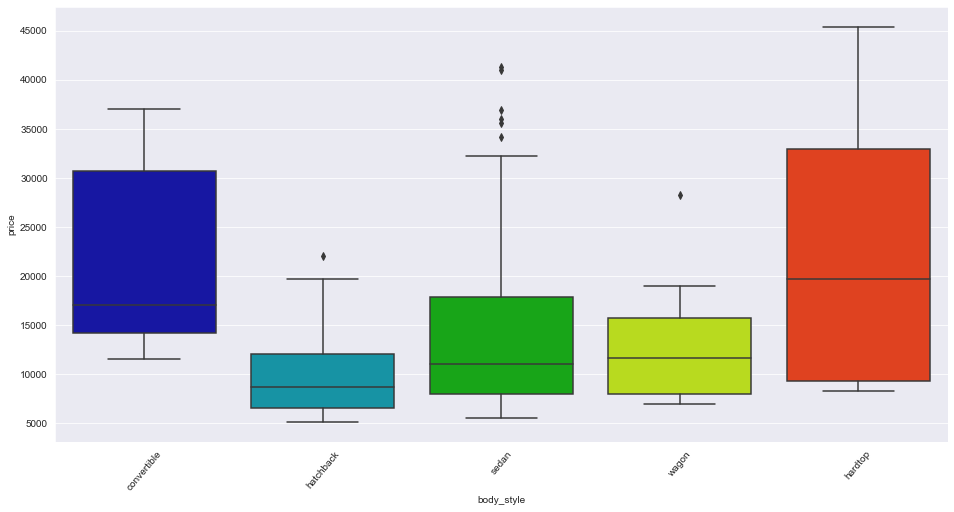

In [17]:
plt.figure(figsize = (16, 8))
make_pt = sns.boxplot(x = "body_style", y = "price", data = df_auto, palette = "nipy_spectral")
make_pt.set_xticklabels(make_pt.get_xticklabels(), rotation=50);

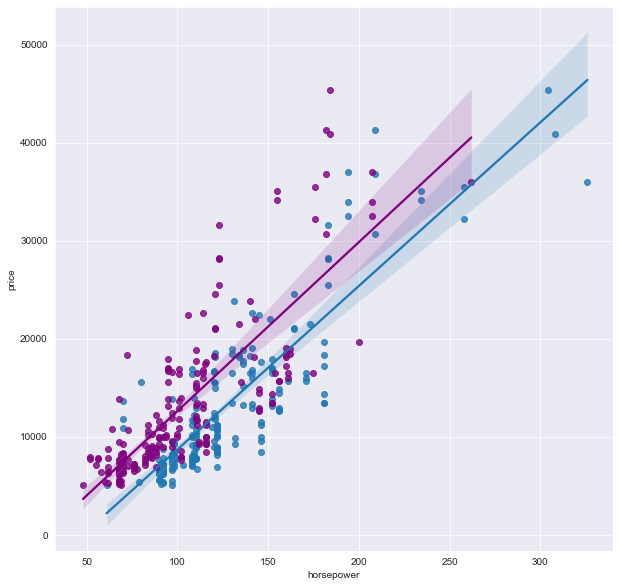

In [18]:
plt.figure(figsize = (10, 10))
sns.regplot(x="engine_size", y = "price", data = df_auto)
sns.regplot(x = "horsepower", y = "price", data = df_auto, color = "purple")

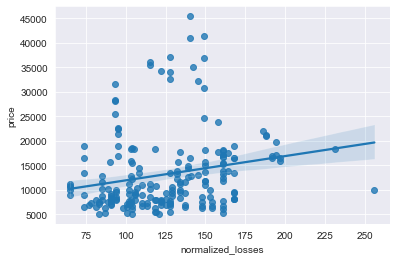

In [19]:
sns.regplot(x= "normalized_losses", y = "price", data =df_auto)

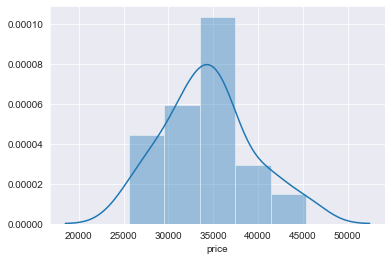

In [20]:
df4 = df_auto.loc[(df_auto["price"]> 25000)]
sns.distplot(df4.price)

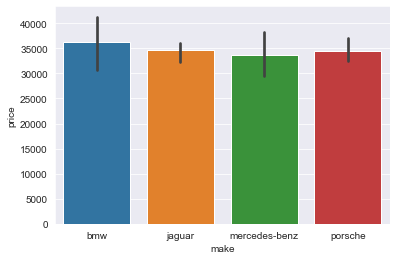

In [21]:
sns.barplot(x = "make", y = "price", data = df4)

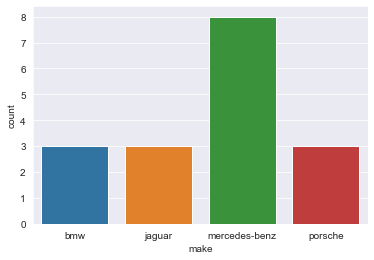

In [22]:
sns.countplot(df4.make)

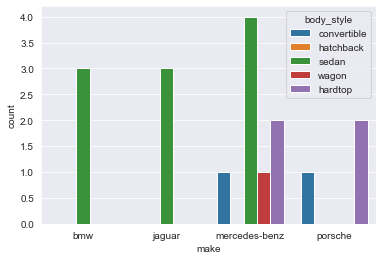

In [23]:
sns.countplot(df4["make"], hue = df_auto.body_style)

#### preprocessing

In [24]:
make = LabelEncoder()
fuel_type = LabelEncoder()
aspiration = LabelEncoder()
num_doors = LabelEncoder()
body_style = LabelEncoder()
drive_wheels = LabelEncoder()
engine_location = LabelEncoder()
engine_type = LabelEncoder()
cylinder_num = LabelEncoder()
fuel_system = LabelEncoder()

df_auto["make_n"] = make.fit_transform(df_auto["make"])
df_auto["fuel_type_n"] = fuel_type.fit_transform(df_auto["fuel_type"])
df_auto["aspiration_n"] = aspiration.fit_transform(df_auto["aspiration"])
df_auto["number_of_doors_n"] = num_doors.fit_transform(df_auto["number_of_doors"])
df_auto["body_style_n"] = body_style.fit_transform(df_auto["body_style"])
df_auto["drive_wheels_n"] = drive_wheels.fit_transform(df_auto["drive_wheels"])
df_auto["engine_location_n"] = engine_location.fit_transform(df_auto["engine_location"])
df_auto["engine_type_n"] = engine_type.fit_transform(df_auto["engine_type"])
df_auto["number_of_cylinders_n"] = cylinder_num.fit_transform(df_auto["number_of_cylinders"])
df_auto["fuel_system_n"] = fuel_system.fit_transform(df_auto["fuel_system"])

In [25]:
df_n = df_auto.drop(["make", "fuel_type", "aspiration", "number_of_doors", "body_style", "drive_wheels", "engine_location", "engine_type", "number_of_cylinders", "fuel_system"], axis = "columns")

In [26]:
df_n

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,make_n,fuel_type_n,aspiration_n,number_of_doors_n,body_style_n,drive_wheels_n,engine_location_n,engine_type_n,number_of_cylinders_n,fuel_system_n
0,3,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,1,0,2,0,0,2,5
1,3,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,1,0,2,0,0,2,5
2,1,168,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,1,2,2,0,4,3,5
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,1,0,0,3,1,0,2,2,5
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,1,0,0,3,0,0,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,21,1,0,0,3,2,0,2,2,5
197,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,21,1,1,0,3,2,0,2,2,5
198,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,21,1,0,0,3,2,0,4,3,5
199,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,21,0,1,0,3,2,0,2,3,3


In [34]:
X = df_n.drop("price", axis = 1)
y = df_n["price"]
print(X.shape)
print(y.shape)

(201, 25)
(201,)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 43)

### building the models

#### Model 1

In [48]:
L = LinearRegression()

In [49]:
L.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred = L.predict(X_test)

In [51]:
test_pr = pd.DataFrame({"actual": y_test, "predicted": y_pred})
test_pr
price_mae = mean_absolute_error(y_test, y_pred)
print(price_mae)

2843.0690505836706


In [52]:
print(L.score(X_test, y_test))

0.7839032250842077


In [53]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

3926.3935326054607

#### Model 2

In [54]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

In [68]:
for max_leaf_nodes in[5,40, 45, 50]:
    best_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, best_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2709
Max leaf nodes: 40  		 Mean Absolute Error:  2405
Max leaf nodes: 45  		 Mean Absolute Error:  2377
Max leaf nodes: 50  		 Mean Absolute Error:  2438


In [69]:
Dt = DecisionTreeRegressor(max_leaf_nodes =45, random_state = 10) 

In [70]:
Dt.fit(X_train, y_train)
D_predict = Dt.predict(X_test)

In [71]:
print(Dt.score(X_test, y_test))

0.8183821910504017
